<a href="https://colab.research.google.com/github/PadariyaDebo/Synthetic-Data-Genration-using-GAN/blob/main/DGAN_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch numpy pandas matplotlib scikit-learn

!pip install git+https://github.com/gretelai/gretel-synthetics.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/gretelai/gretel-synthetics.git to /tmp/pip-req-build-5wunaal0
  Running command git clone -q https://github.com/gretelai/gretel-synthetics.git /tmp/pip-req-build-5wunaal0
     |████████████████████████████████| 67 kB 949 kB/s 
     |████████████████████████████████| 1.2 MB 48.1 MB/s 
     |████████████████████████████████| 251 kB 71.2 MB/s 
     |████████████████████████████████| 4.3 MB 54.0 MB/s 
  Created wheel for gretel-synthetics: filename=gretel_synthetics-0.18.1.dev13+g2ed9d31-py3-none-any.whl size=88614 sha256=e276857adf10bf79f06d4168a41444cd43e3af22299329676076b749c705e642
  Stored in directory: /tmp/pip-ephem-wheel-cache-js3_mufa/wheels/b5/7c/a8/4f4a8c4cabad5d9a6dcb7a23500f8fba24a7a4e02fd1bcebee
Successfully built gretel-synthetics
  Attempting uninstal

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as md

import torch

from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig, OutputType

In [14]:
sensor_df = pd.read_csv("https://raw.githubusercontent.com/ulklc/covid19-timeseries/master/countryReport/country/AD.csv")
sensor_df["day"] = pd.to_datetime(sensor_df["day"])
sensor_df

,day,countryCode,countryName,region,lat,lon,confirmed,recovered,death
0,2020-01-22,AD,Andorra,Europe,42.5,1.5,0,0,0
1,2020-01-23,AD,Andorra,Europe,42.5,1.5,0,0,0
2,2020-01-24,AD,Andorra,Europe,42.5,1.5,0,0,0
3,2020-01-25,AD,Andorra,Europe,42.5,1.5,0,0,0
4,2020-01-26,AD,Andorra,Europe,42.5,1.5,0,0,0
...,...,...,...,...,...,...,...,...,...
316,2020-12-03,AD,Andorra,Europe,42.5,1.5,6904,6066,77
317,2020-12-04,AD,Andorra,Europe,42.5,1.5,6955,6130,77
318,2020-12-05,AD,Andorra,Europe,42.5,1.5,7005,6171,78
319,2020-12-06,AD,Andorra,Europe,42.5,1.5,7050,6238,78


In [15]:
COLUMNS = ["confirmed", "recovered", "death"]

train_df = sensor_df[["day"] + COLUMNS]
train_df

,day,confirmed,recovered,death
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
316,2020-12-03,6904,6066,77
317,2020-12-04,6955,6130,77
318,2020-12-05,7005,6171,78
319,2020-12-06,7050,6238,78


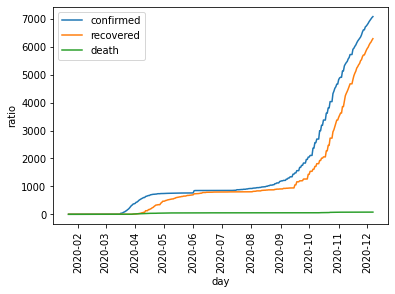

In [16]:
for c in COLUMNS:
    plt.plot(train_df["day"], train_df[c], label=c)
plt.xticks(rotation=90)
plt.legend()
plt.ylabel("ratio")
plt.xlabel("day")
plt.show()

In [17]:
# DGAN needs many example time series to train. Split into 1-day slices to
# create multiple examples.
features = train_df.drop(columns="day").to_numpy()
# Obsevations every 10 minutes, so 144 * 10 minutes = 1 day
n = features.shape[0] // 144
features = features[:(n*144),:].reshape(-1, 144, features.shape[1])
# Shape is now (# examples, # time points, # features)
print(features.shape)

(2, 144, 3)


2022-07-16 01:52:33,762 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:34,649 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:34,699 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:35,817 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:35,866 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:36,363 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ...

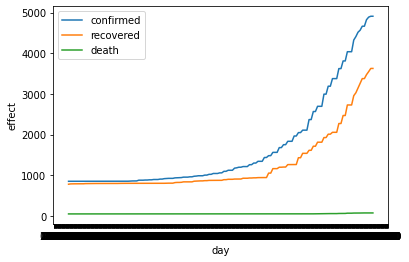

2022-07-16 01:52:41,823 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:42,754 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:42,807 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:43,938 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:43,989 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:44,522 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ...

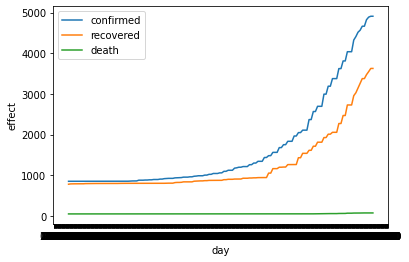

2022-07-16 01:52:50,024 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:50,988 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:51,039 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:52,211 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:52,260 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ..., 737596.0833333334]), which exceeds Locator.MAXTICKS (1000).
2022-07-16 01:52:52,833 : MainThread : WARNING : Locator attempting to generate 1258 ticks ([737438.9583333334, ...

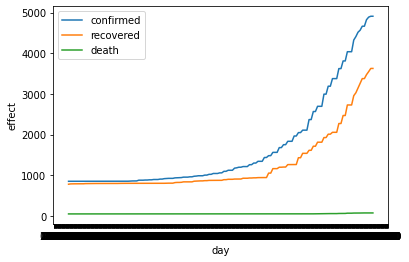

In [25]:
# Show a few of the 1-day training samples
xaxis_1day = train_df["day"][0:144]

def plot_day(f):
    for i, c in enumerate(COLUMNS):
        plt.plot(xaxis_1day, f[:,i], label=c)
    ax = plt.gca()
    ax.xaxis.set_major_locator(md.HourLocator(byhour=range(2,24,3)))
    ax.xaxis.set_major_formatter(md.DateFormatter("%H:%M"))
    plt.legend()
    plt.xlabel("day")
    plt.ylabel("effect")
    plt.show()

plot_day(features[1,:,:])
plot_day(features[1,:,:])
plot_day(features[1,:,:])

In [26]:
# Recommended to train with a GPU
torch.cuda.is_available()

True

In [31]:


# Train DGAN model
model = DGAN(DGANConfig(
    max_sequence_len=features.shape[1],
    sample_len=12,
    batch_size=min(1000, features.shape[0]),
    apply_feature_scaling=True,
    apply_example_scaling=False,
    use_attribute_discriminator=False,
    generator_learning_rate=1e-4,
    discriminator_learning_rate=1e-4,
    epochs=10000,
))

model.train_numpy(
    features,
    feature_types=[OutputType.CONTINUOUS] * features.shape[2],
)
# Generate synthetic data
_, synthetic_features = model.generate_numpy(1000)

Streaming output truncated to the last 5000 lines.
2022-07-16 02:04:30,462 : MainThread : INFO : epoch: 5000
2022-07-16 02:04:30,497 : MainThread : INFO : epoch: 5001
2022-07-16 02:04:30,532 : MainThread : INFO : epoch: 5002
2022-07-16 02:04:30,569 : MainThread : INFO : epoch: 5003
2022-07-16 02:04:30,604 : MainThread : INFO : epoch: 5004
2022-07-16 02:04:30,639 : MainThread : INFO : epoch: 5005
2022-07-16 02:04:30,676 : MainThread : INFO : epoch: 5006
2022-07-16 02:04:30,709 : MainThread : INFO : epoch: 5007
2022-07-16 02:04:30,744 : MainThread : INFO : epoch: 5008
2022-07-16 02:04:30,785 : MainThread : INFO : epoch: 5009
2022-07-16 02:04:30,818 : MainThread : INFO : epoch: 5010
2022-07-16 02:04:30,854 : MainThread : INFO : epoch: 5011
2022-07-16 02:04:30,896 : MainThread : INFO : epoch: 5012
2022-07-16 02:04:30,932 : MainThread : INFO : epoch: 5013
2022-07-16 02:04:30,969 : MainThread : INFO : epoch: 5014
2022-07-16 02:04:31,007 : MainThread : INFO : epoch: 5015
2022-07-16 02:04:31,0

In [32]:
synthetic_df = pd.DataFrame(synthetic_features.reshape(-1, synthetic_features.shape[2]), columns=train_df.columns[1:])

print("Correlation in real data:")
print(train_df.corr())
print()
print("Correlation in synthetic data:")
print(synthetic_df.corr())


Correlation in real data:
           confirmed  recovered     death
confirmed   1.000000   0.989891  0.727817
recovered   0.989891   1.000000  0.722248
death       0.727817   0.722248  1.000000

Correlation in synthetic data:
           confirmed  recovered     death
confirmed   1.000000   0.987442  0.698217
recovered   0.987442   1.000000  0.757092
death       0.698217   0.757092  1.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


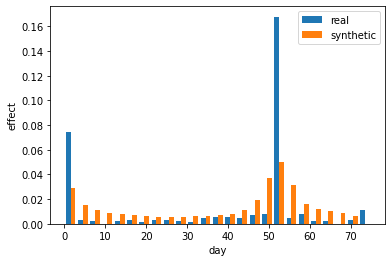

In [33]:
# Compare distribution of T_out values
plt.hist([features[:,:,2].flatten(), synthetic_features[:,:,2].flatten()], 
         label=["real", "synthetic"],
         bins=25,
         density=True)
plt.legend()
plt.xlabel("day")
plt.ylabel("effect")
plt.show()
